# Flood Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.stats import skew

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Data Description

The dataset used for this analysis comprises numerous features, each representing a distinct parameter that influences flood occurrence and severity. These parameters include environmental factors such as monsoon intensity, river management, and topography drainage, as well as human-related factors like encroachments and societal vulnerability. Each row in the dataset corresponds to a specific region, with the columns providing scores for each parameter in that region. These scores quantify the level or impact of each parameter in the respective region, offering a comprehensive view of the contributing factors to flood risk. No further info about the regions, or countries were given.

- **MonsoonIntensity**: Higher volumes of rain during monsoons increase the probability of floods.
- **TopographyDrainage**: The drainage capacity based on the region's topography. Efficient drainage can help drain rainwater and reduce the risk of floods.
- **RiverManagement**: The quality and effectiveness of river management practices. Proper river management, including dredging and bank maintenance, can improve water flow and reduce floods.
- **Deforestation**: The extent of deforestation in the area.* Deforestation reduces the soil's ability to absorb water, increasing surface runoff and the risk of floods.
- **Urbanization**: The level of urbanization in the region. Urban areas have impermeable surfaces (asphalt, concrete), which reduce water infiltration, raising the risk of floods.
- **ClimateChange**: The impact of climate change on the region. Climate change can lead to more extreme precipitation patterns, including torrential rains that can cause floods.
- **DamsQuality**: The quality and maintenance status of dams. Well-maintained dams can control floods, and dams with structural problems can break and cause catastrophic floods.
- **Siltation**: The extent of siltation in rivers and reservoirs. The accumulation of sediments in rivers (siltation) reduces drainage capacity and increases the risk of floods.
- **Agricultural Practices**: The types and sustainability of agricultural practices. The intensification of agriculture can lead to deforestation, excessive use of fertilizers and pesticides, and inappropriate irrigation practices, reducing soil biodiversity and increasing the risk of floods.
- **Encroachments**:The degree of encroachment on flood plains and natural waterways. Construction in flood-prone areas impedes the natural flow of water and increases the risk of floods.
- **IneffectiveDisasterPreparedness**: ** The lack of emergency plans, warning systems, and simulations increases the negative impact of floods.
- **DrainageSystems**: Well-maintained and adequately sized drainage systems help drain rainwater and reduce the risk of floods.
- **CoastalVulnerability**: Low-lying coastal areas are prone to flooding from storm surges and sea level rise.
- **Landslides**: Steep slopes and unstable soils are more prone to landslides.
- **Watersheds**: Regions with more watersheds may have a higher or lower risk of flooding, depending on various factors.
- **DeterioratingInfrastructure**: Clogged culverts, damaged drainage channels, and other deficient infrastructure can increase the risk of floods.
- **PopulationScore**: Densely populated areas can suffer more severe losses.
- **WetlandLoss**: Wetlands act as natural sponges, absorbing excess water and helping to prevent floods.
- **InadequatePlanning**: Urban planning that does not consider the risk of flooding increases the vulnerability of communities.
- **PoliticalFactors**: Factors such as corruption and a lack of political will to invest in drainage infrastructure can make it difficult to manage flood risk.
- **FloodProbability**: The overall probability of flooding in the region. This is the target variable for predictive analysis. This is the target Variable.

In [8]:
df = pd.read_csv('flood.csv', delimiter=',')
df.columns = df.columns.str.lower().str.replace('.', '_')

df.head()


,monsoonintensity,topographydrainage,rivermanagement,deforestation,urbanization,climatechange,damsquality,siltation,agriculturalpractices,encroachments,...,drainagesystems,coastalvulnerability,landslides,watersheds,deterioratinginfrastructure,populationscore,wetlandloss,inadequateplanning,politicalfactors,floodprobability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


## Exploratory Data Analysis and Feature Engineering

### Checking Data Type and Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   monsoonintensity                 50000 non-null  int64  
 1   topographydrainage               50000 non-null  int64  
 2   rivermanagement                  50000 non-null  int64  
 3   deforestation                    50000 non-null  int64  
 4   urbanization                     50000 non-null  int64  
 5   climatechange                    50000 non-null  int64  
 6   damsquality                      50000 non-null  int64  
 7   siltation                        50000 non-null  int64  
 8   agriculturalpractices            50000 non-null  int64  
 9   encroachments                    50000 non-null  int64  
 10  ineffectivedisasterpreparedness  50000 non-null  int64  
 11  drainagesystems                  50000 non-null  int64  
 12  coastalvulnerabili

In [10]:
df.isnull().sum()

monsoonintensity                   0
topographydrainage                 0
rivermanagement                    0
deforestation                      0
urbanization                       0
climatechange                      0
damsquality                        0
siltation                          0
agriculturalpractices              0
encroachments                      0
ineffectivedisasterpreparedness    0
drainagesystems                    0
coastalvulnerability               0
landslides                         0
watersheds                         0
deterioratinginfrastructure        0
populationscore                    0
wetlandloss                        0
inadequateplanning                 0
politicalfactors                   0
floodprobability                   0
dtype: int64

- There are no missing values in these numeric columns.
- The dataset includes no categorical variables. 
- All columns are int64 type except for the `floodprobability` which is a float.

### Ranges of values

In [11]:
df.describe()

,monsoonintensity,topographydrainage,rivermanagement,deforestation,urbanization,climatechange,damsquality,siltation,agriculturalpractices,encroachments,...,drainagesystems,coastalvulnerability,landslides,watersheds,deterioratinginfrastructure,populationscore,wetlandloss,inadequateplanning,politicalfactors,floodprobability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


### Correlation matrix
We want to calculate the correlation coefficient between parameters to see the ones we can drop to reduce the number of parameters.

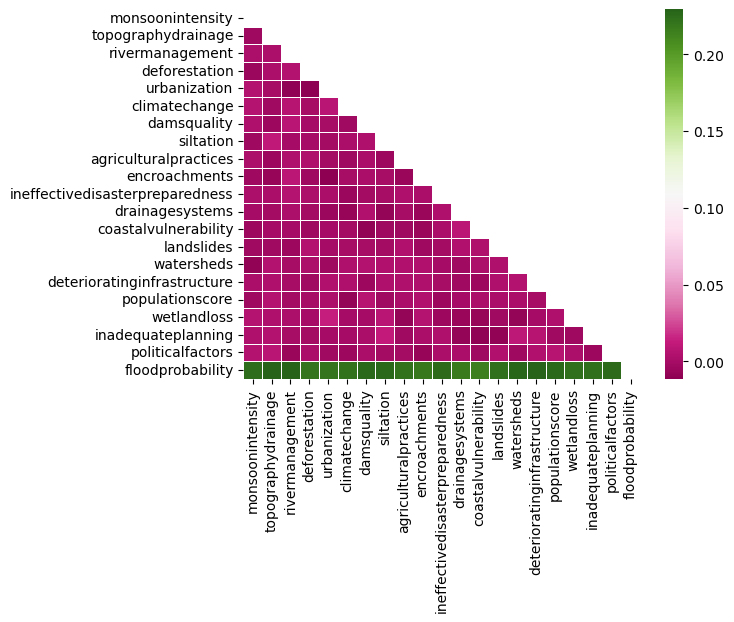

In [12]:
correlation_matrix = df.corr()
#plt.figure(figsize=(20, 20)) 
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, cmap='PiYG', linewidths=0.5, mask=mask)
plt.show()

Notes :
- `flood probability` is equally correlated with all the parameters.
- The parameters themselves show very low correlation with each other.  

This suggests that the dataset might have a highly complex, multi-dimensional relationship with flood probability.  
In such a case, traditional linear models might not perform well, as they rely on strong relationships between the features.

### Feature Engineering 
Some features are related conceptually, to simplify the model, we can combine them manually into new composite features.  
- `deforestation`, `urbanization`, and `agricultural practices` are related to *human activities* that contribute to environmental degradation and flood risk. These three variables likely reflect human-induced changes in land use that may impact flood probability, and grouping them could capture a broader effect.
- `ineffectivedisasterpreparedness`, `deterioratinginfrastructure`, `inadequateplanning`, and `politicalfactor` are related as poor political factors can hinder effective infrastructure investment, and deteriorating infrastructure can leave a region ill-prepared for disasters. Combining them provides a measure of *societal vulnerability* to floods.
- `damsquality`, `watersheds`,  `siltation` and `drainagesystems` can be combined into a *Water Infrastructure* score.

The question that arises is how to combine these variables, should we consider a **sum/average** operation or a **weighted summation** (how to determine weights ?) ?  

1. In the dataset information, the region from which the data was collected was not provided. We could have inquired about the specific region to better understand the local context and determine which parameters have the most significant impact, allowing us to assign appropriate weights. We will take the average score of `deforestation`, `urbanization`, and `agricultural practices`.
2. `ineffectivedisasterpreparedness` and `deterioratinginfrastructure` have an immediate impact on vulnerability, so we assign them a slightly higher weight compared to `inadequateplanning`, and `politicalfactor`  whose effects are more long-term.
3. `damsquality` should be assigned 40%, `watersheds` 30%, `drainagesystems` 20%, and `siltation` 10%. This reflects the direct impact of drainage systems on flood risk management, while acknowledging the long-term effects of siltation and the critical role of dams and watersheds in flood control.

In [13]:
df['human_activities'] = round((df['deforestation'] + df['urbanization'] + df['agriculturalpractices']) / 3,1)
df['societal_vulnerability'] = round((0.3*df['ineffectivedisasterpreparedness'] + 0.3*df['deterioratinginfrastructure'] + 0.2*df['inadequateplanning']+ 0.2*df['politicalfactors']) / 4,1)
df['water_infrastructure'] = round((0.4*df['damsquality'] + 0.3*df['watersheds']+ 0.4*df['siltation'] + 0.6*df['drainagesystems']),1)
df['flood_probability'] = (df['floodprobability'])

In [14]:
df = df.drop(columns=['deforestation','urbanization', 'agriculturalpractices','ineffectivedisasterpreparedness', 
                      'deterioratinginfrastructure', 'inadequateplanning', 'politicalfactors', 'damsquality','watersheds', 'siltation', 'drainagesystems', 'floodprobability' ])

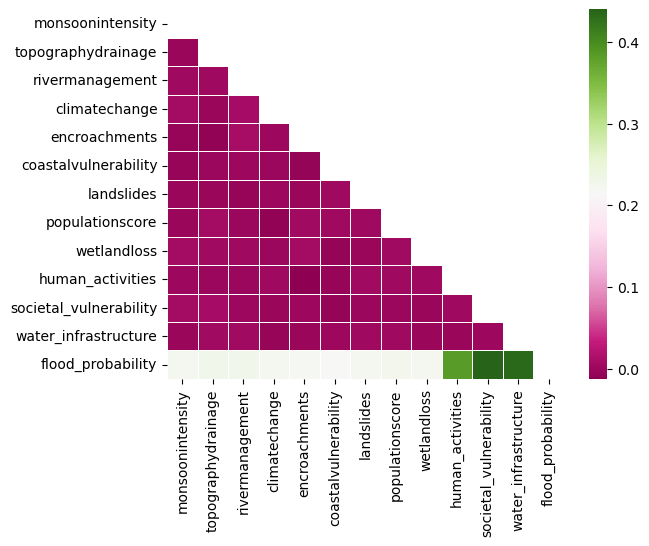

In [15]:
correlation_matrix = df.corr()
#plt.figure(figsize=(10, 10)) 
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, cmap='PiYG', linewidths=0.5, mask=mask)
plt.show()

### Data Distribution

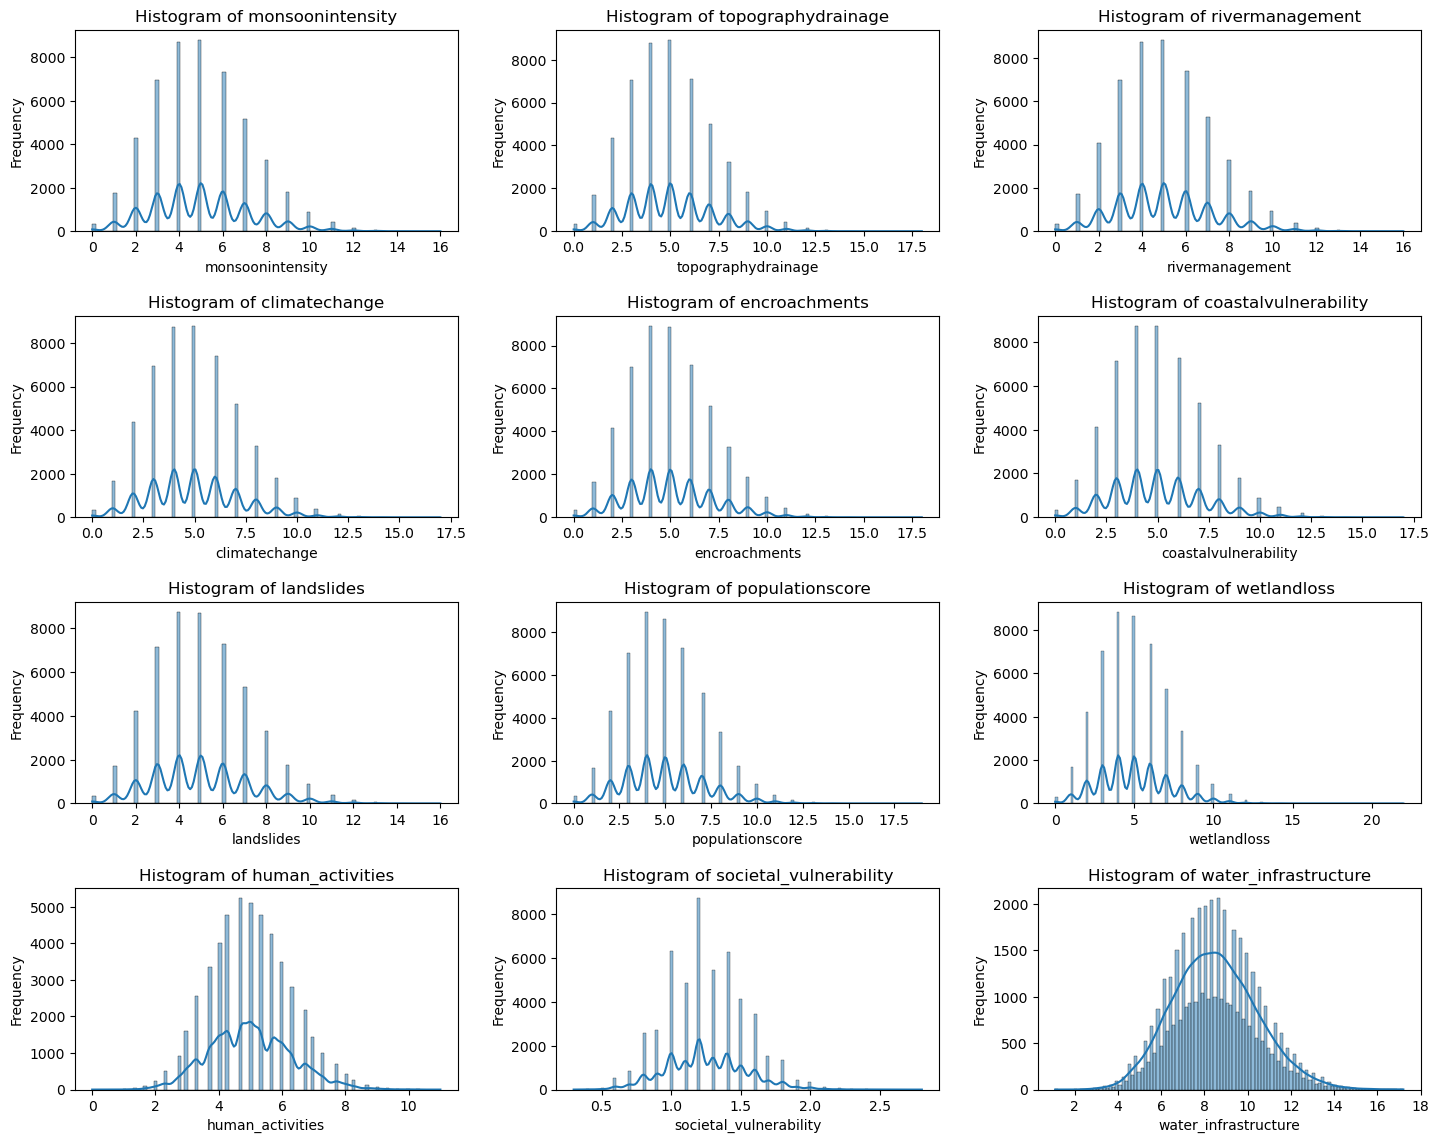

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.tight_layout(pad=4.0)  # Add space between plots
axes = axes.flatten()

columns = df.columns
for i in range(12):
    sns.histplot(df[columns[i]], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {columns[i]}')
    axes[i].set_xlabel(columns[i])
    axes[i].set_ylabel('Frequency')

# Show the plot
plt.show()

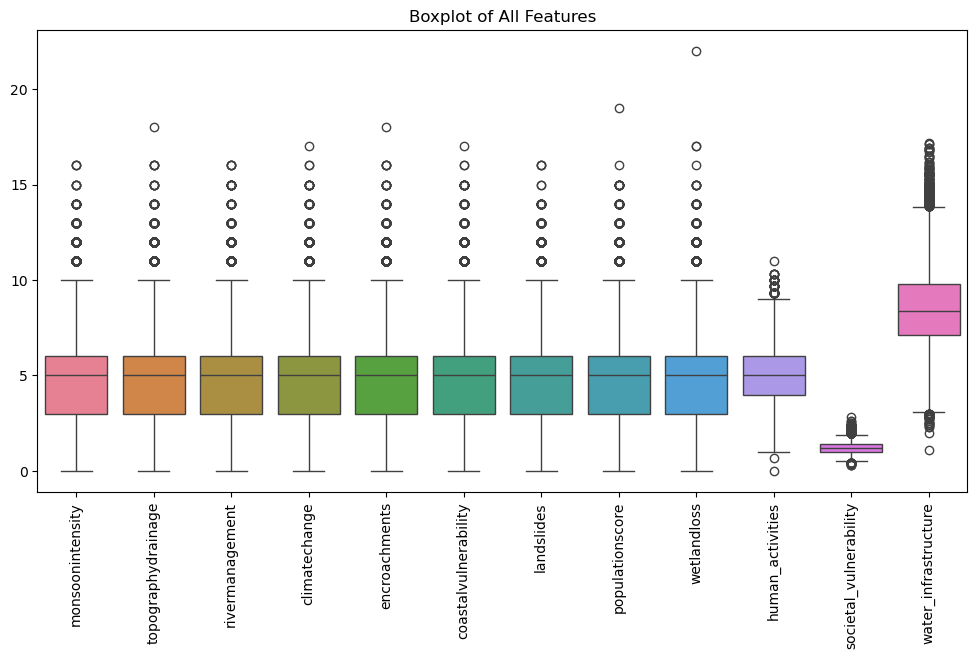

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns[0:12]])
plt.title('Boxplot of All Features')
plt.xticks(rotation=90)  # Rotate feature names if needed
plt.show()


Notes : 
- All values range from 0 to 19, except for  `wetandloss` that has a max value of 22. No info on the range of the scoring system was given, we choose to make the assumption that the scores go from 0 to 20. Point values over 20 are considered input errors and deleted.
- Outliers are not removed as some regions can have unique characteristics or particularities (more extreme monsoon intensities, or specific topographical features), these outliers could represent real and important variations in flood risk.

In [18]:
df = df[df.apply(lambda x: x <= 20).all(axis=1)]
df.to_csv('flood_cleaned.csv', index=False)  

In [19]:
outlier_summary = {}

for column in df.columns[0:12]:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    regular_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

    outlier_summary[column] = {
        'Regular Outliers': regular_outliers
    }

outlier_summary_df = pd.DataFrame(outlier_summary).T
outlier_summary_df = outlier_summary_df.sort_values(by='Regular Outliers', ascending=False)
outlier_summary_df

,Regular Outliers
coastalvulnerability,747
topographydrainage,711
encroachments,688
monsoonintensity,686
populationscore,677
wetlandloss,673
rivermanagement,661
climatechange,647
landslides,645
societal_vulnerability,633


- **Coastal Vulnerability, Topography Drainage, and Encroachments**:  
These parameters have the highest number of regular outliers (from 688 to 747). It suggests that the data for these variables has significant variability, it can be to highly differing regional conditions. 
- **Monsoon Intensity, Population Score, Wetland Loss, and River Management**:
These features also exhibit many regular outliers (over 600), which could indicate variability related to regional differences or diverse climatic and socio-environmental conditions.
- **Societal Vulnerability and Water Infrastructure**:
The number of regular outliers for societal vulnerability is relatively moderate (472), which may reflect a more focused variation in data collection or modeling.
- **Human Activities**:
Fewest outliers (84). This feature is relatively stable, data points do not deviate significantly from the central trend.


The combining parameters step previously done appears to reduce variability and outliers, showing that these aggregated features are well-represented.


### Flood Data
- `flood_probability` distribution
- Flood event pie chart, taking as 0.5 as a starting threshold, might not be suitable.

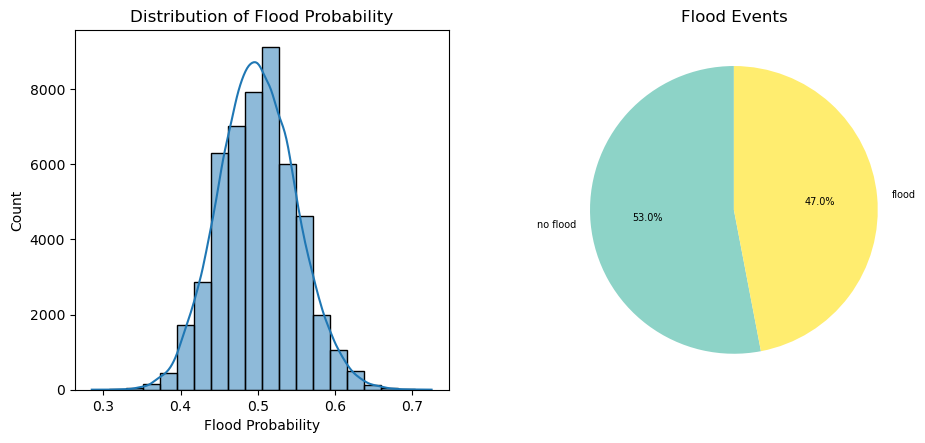

Skewness of flood probability: 0.0952307374116455


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=4.0)  # Add space between plots

sns.histplot(df['flood_probability'], kde=True, bins=20, ax=axes[0])
axes[0].set_title('Distribution of Flood Probability')
axes[0].set_xlabel('Flood Probability')
axes[0].set_ylabel('Count')

flood_occurred = pd.Series(['flood' if prob > 0.5 else 'no flood' for prob in df['flood_probability']])
group_counts = flood_occurred.value_counts()
group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', textprops={'fontsize': 7}, ax=axes[1])
axes[1].set_title('Flood Events')
axes[1].set_ylabel('') 

plt.show()

from scipy.stats import skew
flood_probability_skewness = skew(df['flood_probability'])
print(f'Skewness of flood probability: {flood_probability_skewness}')

## Data Splitting

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, shuffle = True)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, shuffle = True)

In [22]:
len(df_train), len(df_val), len(df_test)

(29999, 10000, 10000)

In [23]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y = df_full_train.flood_probability
y_train = df_train.flood_probability
y_val = df_val.flood_probability
y_test = df_test.flood_probability

del df_full_train['flood_probability']
del df_train['flood_probability']
del df_val['flood_probability']
del df_test['flood_probability']

In [24]:
dico = df_full_train.to_dict(orient='records')
train_dicts = df_train.to_dict(orient='records')
train_val = df_val.to_dict(orient='records')
train_test = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dico)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(train_val)
X_test = dv.transform(train_test)

features = dv.get_feature_names_out()
features 

array(['climatechange', 'coastalvulnerability', 'encroachments',
       'human_activities', 'landslides', 'monsoonintensity',
       'populationscore', 'rivermanagement', 'societal_vulnerability',
       'topographydrainage', 'water_infrastructure', 'wetlandloss'],
      dtype=object)

## Feature Importance Analysis

Feature Importances:
                   Feature  Importance
10    water_infrastructure    0.204605
8   societal_vulnerability    0.188339
3         human_activities    0.152985
7          rivermanagement    0.052718
6          populationscore    0.051973
0            climatechange    0.050994
9       topographydrainage    0.050622
4               landslides    0.050355
11             wetlandloss    0.049980
1     coastalvulnerability    0.049869
2            encroachments    0.049586
5         monsoonintensity    0.047973


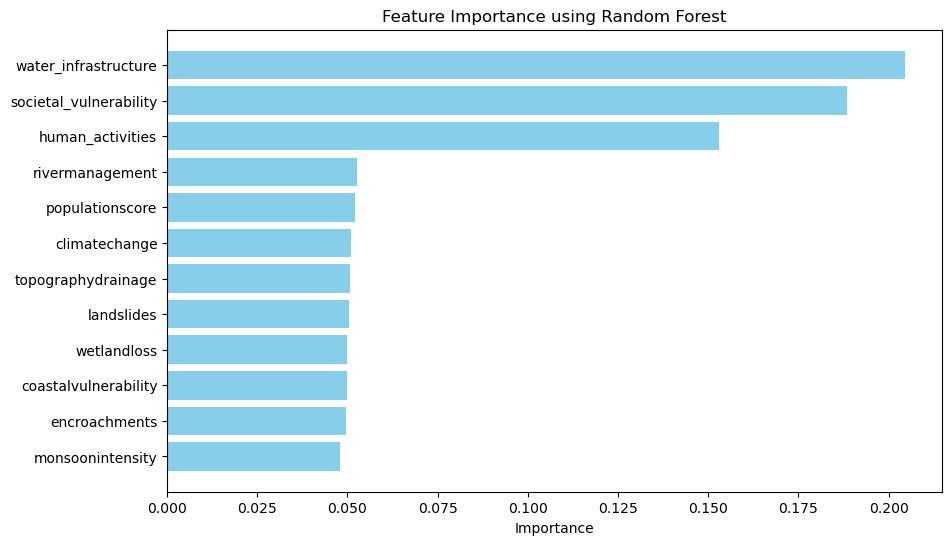

In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
features = dv.get_feature_names_out()  

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color="skyblue")
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()

- Societal Vulnerability and Water Infrastructure : most important factors, suggesting that the local preparedness and infrastructure are key drivers of flood risk.
- Human Activities also highly influential, human-induced changes are major contributors to flooding.
- Physical, Environmental, Climate and Coastal Factors have a moderate but secondary impact, indicating they are still relevant but less directly impactful than societal and infrastructure factors. For Climate and Coastal Factors, it also suggests a focus on more immediate flood risks rather than long-term or distant climate effects.

## Model Training
The goal is to predict the flood probability from features above.  
We'll use : 
- Linear Regression
- Random forest
- XGBoost

### Linear Regression

In [26]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_val)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"Training RMSE : {rmse_train:.4f}")
print(f"Validation RMSE : {rmse_val:.4f}")


Training RMSE : 0.0075
Validation RMSE : 0.0074


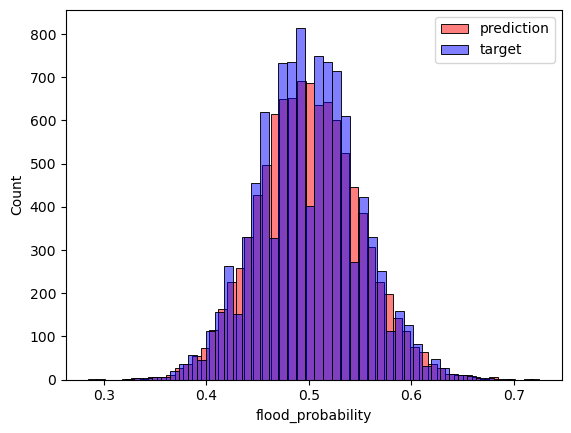

In [27]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()
plt.show()

### Random Forest
Tuning : 
- `n_estimators` 
- `max_depth`
- `min_samples_leaf`

In [28]:
scores = []

for n in range(1,30,3):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred_train = rf.predict(X_train)
    y_pred = rf.predict(X_val)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, rmse_train, rmse_val))
    print('%i -> %.3f, %.3f,' % (n, rmse_train, rmse_val))

1 -> 0.021, 0.035,
4 -> 0.012, 0.024,
7 -> 0.010, 0.022,
10 -> 0.009, 0.021,
13 -> 0.009, 0.021,
16 -> 0.009, 0.020,
19 -> 0.008, 0.020,
22 -> 0.008, 0.020,
25 -> 0.008, 0.020,
28 -> 0.008, 0.020,


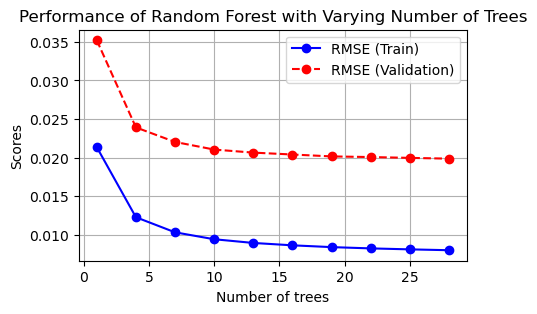

In [29]:
n = range(1,20,2)
column = ['n', 'rmse_train', 'rmse_val']
score = pd.DataFrame(scores)
score.columns = column

plt.figure(figsize=(5, 3))
plt.plot(score.n, score.rmse_train, label="RMSE (Train)", marker='o', linestyle='-', color='b')
plt.plot(score.n, score.rmse_val, label="RMSE (Validation)", marker='o', linestyle='--', color='r')
plt.xlabel('Number of trees')
plt.ylabel('Scores')
plt.title('Performance of Random Forest with Varying Number of Trees')
plt.legend()
plt.grid(True)
plt.show()


Notes : 
- Both curves follow the same trend, RMSE decreases steadily as the number of trees increases, which indicates that the model fits the data better as complexity grows.
- The validation RMSE does not follow the training RMSE as closely. This widening gap suggests overfitting: the model does not generalize well to unseen data.
- We'll take an optimal value of 5 trees.

In [30]:
depths = [1, 2, 3, 4, 5, 6, 10, 12, 15, 17, 20, 25, 30, 50]
scores = []
for d in depths:
    rf = RandomForestRegressor(n_estimators=5, max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    
    y_pred_train = rf.predict(X_train)
    y_pred = rf.predict(X_val)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((d, rmse_train, rmse_val))
    print('%i -> %.3f, %.3f,' % (d, rmse_train, rmse_val))

1 -> 0.047, 0.046,
2 -> 0.043, 0.043,
3 -> 0.040, 0.040,
4 -> 0.038, 0.038,
5 -> 0.036, 0.036,
6 -> 0.033, 0.034,
10 -> 0.023, 0.027,
12 -> 0.017, 0.025,
15 -> 0.013, 0.023,
17 -> 0.012, 0.023,
20 -> 0.011, 0.023,
25 -> 0.011, 0.023,
30 -> 0.011, 0.023,
50 -> 0.011, 0.023,


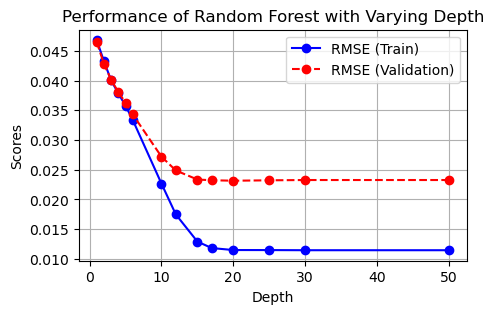

In [31]:
column = ['d', 'rmse_train', 'rmse_val']
score = pd.DataFrame(scores)
score.columns = column

plt.figure(figsize=(5, 3))
plt.plot(score.d, score.rmse_train, label="RMSE (Train)", marker='o', linestyle='-', color='b')
plt.plot(score.d, score.rmse_val, label="RMSE (Validation)", marker='o', linestyle='--', color='r')
plt.xlabel('Depth')
plt.ylabel('Scores')
plt.title('Performance of Random Forest with Varying Depth')
plt.legend()
plt.grid(True)
plt.show()


Notes : 
- Up untill a depth of 6, the performances of the model are the same on training and validation data. 
- For a depth over 6, the RMSE on the training data decreases significantly and plateaus around a certain depth.
- RMSE on validation shows the same trend, but the decrease is less steep, causing a difference between the two values and suggests overfitting.
- Optimal value taken depth = 6.

In [32]:
scores = []
for s in range(1,50,10):
    rf = RandomForestRegressor(n_estimators=5, max_depth=6, min_samples_leaf=s, random_state=42)
    rf.fit(X_train, y_train)
    
    y_pred_train = rf.predict(X_train)
    y_pred = rf.predict(X_val)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((s, rmse_train, rmse_val))
    print('%i -> %.3f, %.3f,' % (s, rmse_train, rmse_val))

1 -> 0.033, 0.034,
11 -> 0.033, 0.034,
21 -> 0.033, 0.034,
31 -> 0.033, 0.034,
41 -> 0.033, 0.034,


`min_samples_leaf` has no significant impact on the RMSE for both the training and validation datasets.


### XGBoost
Using GridSearch to find optimal parameters 

In [33]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [20, 50, 100, 200], 
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
}

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_val = best_model.predict(X_val) 

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print RMSE results
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Training RMSE: 0.0088
Validation RMSE: 0.0094


## Final model
After training a linear regression, random forest and XGBoost. We select the linear regression model as as it achieved a slightly lower RMSE, despite XGBoost delivering comparably close results.

### Cross-Validation 

In [34]:
lr = LinearRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

print(f"Mean RMSE: {rmse_scores.mean()}")

Mean RMSE: 0.007464187106836981


In [35]:
model_final = LinearRegression()
model_final.fit(X_train, y_train)
y_pred = model_final.predict(X_val)